<a href="https://colab.research.google.com/github/evansemet/538-Riddler-Solutions/blob/main/2022_08_05_Can_You_Knock_Down_The_Last_Bowling_Pin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Riddler Express
From Michael Branicky comes a puzzle that was inspired by an email thread from James Propp:

Suppose you roll a fair six-sided die on a ridged gnocchi board, such that two adjacent faces come up every time.

On average, what is the sum of the numbers shown on those two faces?

In [10]:
six = 6 * 4 + 2 + 3 + 4 + 5
five = 5 * 3 + 1 + 3 + 4
four = 4 * 2 + 1 + 2
three = 3 * 2 + 1 + 2
two = 2 + 1
EV = (six + five + four + three + two) / 12
EV

7.0

#Riddler Classic
Magritte the bowler is back! This time, he is competing head-to-head against fellow bowler Fosse. However, rather than knocking down 10 pins arranged in a triangular formation, they are trying to knock down N2 pins (where N is some very, very large number) arranged in a rhombus.

When Magritte rolls, he always knocks down the topmost pin. Then, if any pin gets knocked down, it has a 50 percent chance of knocking down either of the two pins directly behind it, independently of each other. (If there is only one pin directly behind it, then it too has a 50 percent chance of being knocked over.)

Fosse is a stronger bowler than Magritte. Like Magritte, she always knocks down the topmost pin. But each pin that’s knocked down then has a 70 percent chance (rather than Magritte’s 50 percent) of knocking down any of the pins directly behind it.

What are Magritte’s and Fosse’s respective probabilities of knocking down the bottommost pin in the rhombus formation?

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import numba

In [3]:
@numba.jit()
def prob(N: int, P: float) -> float:
  grid = np.zeros((N, N))
  grid[0][N//2] = 1

  for row in range(1, N//2 + 1):
    for col in range(N):
      if col == 0:
        grid[row][col] = grid[row - 1][col + 1] * P
      elif col == N - 1:
        grid[row][col] = grid[row - 1][col - 1] * P
      else:
        C = grid[row - 1][col - 1] * grid[row - 1][col + 1]
        A = grid[row - 1][col - 1] - C
        B = grid[row - 1][col + 1] - C
        grid[row][col] = (A + B + C) * P

  X = 1
  for row in range(N//2 + 1, N):
    for col in range(X, N - X):
      C = grid[row - 1][col - 1] * grid[row - 1][col + 1]
      A = grid[row - 1][col - 1] - C
      B = grid[row - 1][col + 1] - C
      grid[row][col] = (A + B + C) * P
    X += 1

  return sum(grid[N - 1])

In [4]:
def margritte(N: int) -> float:
  return prob(N, 0.5)

def fosse(N: int) -> float:
  return prob(N, 0.7)

In [5]:
print(margritte(10000))
print(fosse(10000))

0.00013643552839025531
0.5714285714285713


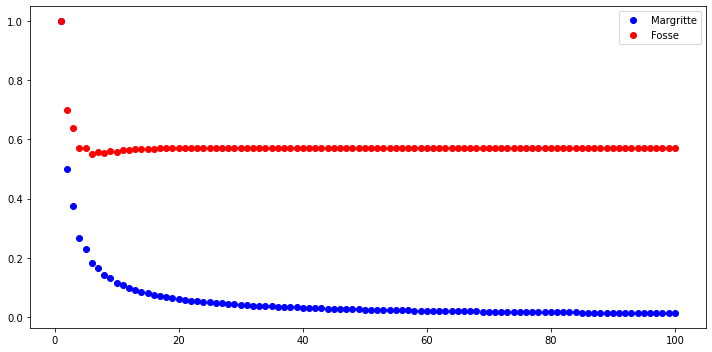

In [9]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

n = [x for x in range(1, 101)]
m = [margritte(x) for x in range(1, 101)]
f = [fosse(x) for x in range(1, 101)]
plt.plot(n[0], m[0], 'o', color='blue', label='Margritte')
plt.plot(n[0], f[0], 'o', color='red', label='Fosse')
for pos in range(1, len(n)):
  plt.plot(n[pos], m[pos], 'o', color='blue')
  plt.plot(n[pos], f[pos], 'o', color='red')

plt.legend(loc="upper right")
plt.show()

For very large values of N, the odds that Margritte knocks down the bottommost pin approaches 0 and the odds that Fosse knocks down the bottommost pin is about 57%.